# Convolutional Neural Networks: Application

In this notebook, We will:

- Create a mood classifer using the TF Keras Sequential API
- Build a ConvNet to identify sign language digits using the TF Keras Functional API

**Skills gained:**

- Build and train a ConvNet in TensorFlow for a __binary__ classification problem
- Build and train a ConvNet in TensorFlow for a __multiclass__ classification problem
- Explain different use cases for the Sequential and Functional APIs


## Table of Contents

- [1 - Packages](#1)
    - [1.1 - Load the Data and Split the Data into Train/Test Sets](#1-1)
- [2 - Layers in TF Keras](#2)
- [3 - The Sequential API](#3)
    - [3.1 - Create the Sequential Model](#3-1)
        - [Project 1 - happyModel](#ex-1)
    - [3.2 - Train and Evaluate the Model](#3-2)
- [4 - The Functional API](#4)
    - [4.1 - Load the SIGNS Dataset](#4-1)
    - [4.2 - Split the Data into Train/Test Sets](#4-2)
    - [4.3 - Forward Propagation](#4-3)
        - [Project 2 - convolutional_model](#ex-2)
    - [4.4 - Train the Model](#4-4)
- [5 - History Object](#5)
- [6 - Bibliography](#6)

<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [3]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets

We'll be using the Happy House dataset, which contains images of peoples' faces. We will build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!  

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [5]:
Y_test[124]

array([1])

You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

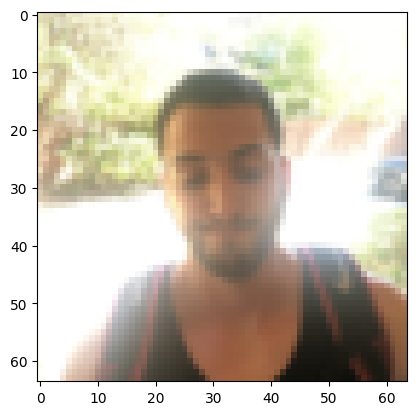

In [6]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

<a name='2'></a>
## 2 - Layers in TF Keras

TF Keras has pre-defined layers we can use.

When we create a layer in TF Keras, we are creating a function that takes some input and transforms it into an output we can reuse later. Nice and easy!

<a name='3'></a>
## 3 - The Sequential API

Most practical applications of deep learning today are built using programming frameworks, which have many built-in functions we can simply call. Keras is a high-level abstraction built on top of TensorFlow, which allows for even more simplified and optimized model creation and training.

we'll create a model using TF Keras' Sequential API, which allows us to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor.

As we'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks.  


<a name='3-1'></a>
### 3.1 - Create the Sequential Model

As mentioned earlier, the TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order.

We can also add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method, much like we would in a regular Python list.

Actually, we can think of a Sequential model as behaving like a list of layers. Like Python lists, Sequential layers are ordered, and the order in which they are specified matters.  If your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model wouldn't be the right choice!

For any layer construction in Keras, we'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor.

<a name='ex-1'></a>
### Project 1 - happyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation.


 **Hint:**

 Use **tfl** as shorthand for **tensorflow.keras.layers**

In [11]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    model = tf.keras.Sequential([
            tfl.Input(shape=(64, 64, 3)),
            tfl.ZeroPadding2D(padding=(3, 3), data_format="channels_last"),
            tfl.Conv2D(32, 7, strides=1),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'),
            tfl.Flatten(),
            tfl.Dense(1, activation='sigmoid')

        ])

    return model

Now that your model is created, you can compile it for training with an optimizer and loss of your choice. When the string `accuracy` is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. This is one of the many optimizations built into TensorFlow that make your life easier! If you'd like to read more on how the compiler operates, check the docs [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

In [12]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

It's time to check your model's parameters with the `.summary()` method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer.

In [13]:
happy_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 70, 70, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model

After creating the model, compiling it with your choice of optimizer and loss function, and doing a sanity check on its contents, you are now ready to build!

Simply call `.fit()` to train. That's it! No need for mini-batching, saving, or complex backpropagation computations. That's all been done for you, as you're using a TensorFlow dataset with the batches specified already. You do have the option to specify epoch number or minibatch size if you like (for example, in the case of an un-batched dataset).

In [14]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.5837 - loss: 2.3421
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9284 - loss: 0.1666
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9588 - loss: 0.1100
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9623 - loss: 0.1004
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9589 - loss: 0.1267
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9396 - loss: 0.1640
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9765 - loss: 0.0644
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9737 - loss: 0.0983
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9621 - loss: 0.0841
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.9741 - loss: 0.0655


After that completes, just use `.evaluate()` to evaluate against your test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the `binary_crossentropy` and the `accuracy` respectively.

In [15]:
happy_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8232 - loss: 0.4252


[0.40541884303092957, 0.8199999928474426]

Easy, right? But what if you need to build a model with shared layers, branches, or multiple inputs and outputs? This is where Sequential, with its beautifully simple yet limited functionality, won't be able to help you.

Next up: Enter the Functional API, your slightly more complex, highly flexible friend.  

<a name='4'></a>
## 4 - The Functional API

Welcome to the second half of the assignment, where you'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits.

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one.

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network. Don't worry, you'll be spending more time with skip connections very soon!

<img src="images/seq_vs_func.png" style="width:350px;height:200px;">

<a name='4-1'></a>
### 4.1 - Load the SIGNS Dataset

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [16]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples.

y = 4


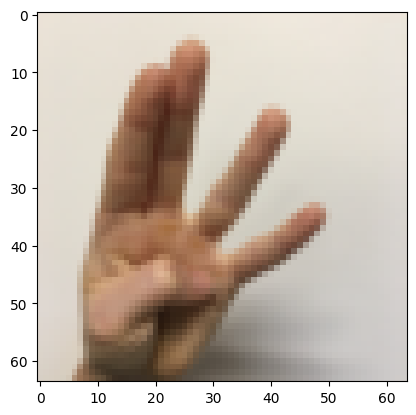

In [17]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='4-2'></a>
### 4.2 - Split the Data into Train/Test Sets

In Course 2, you built a fully-connected network for this dataset. But since this is an image dataset, it is more natural to apply a ConvNet to it.

To get started, let's examine the shapes of your data.

In [18]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='4-3'></a>
### 4.3 - Forward Propagation

In TensorFlow, there are built-in functions that implement the convolution steps for you. By now, you should be familiar with how TensorFlow builds computational graphs. In the [Functional API](https://www.tensorflow.org/guide/keras/functional), you create a graph of layers. This is what allows such great flexibility.

However, the following model could also be defined using the Sequential API since the information flow is on a single line. But don't deviate. What we want you to learn is to use the functional API.

Begin building your graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):**

Then, create a new node in the graph of layers by calling a layer on the `input_img` object:

- **tf.keras.layers.Conv2D(filters= ... , kernel_size= ... , padding='same')(input_img):** Read the full documentation on [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

- **tf.keras.layers.MaxPool2D(pool_size=(f, f), strides=(s, s), padding='same'):** `MaxPool2D()` downsamples your input using a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, you usually operate on a single example at a time and a single channel at a time. Read the full documentation on [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

- **tf.keras.layers.ReLU():** computes the elementwise ReLU of Z (which can be any shape). You can read the full documentation on [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU).

- **tf.keras.layers.Flatten()**: given a tensor "P", this function takes each training (or test) example in the batch and flattens it into a 1D vector.  

    * If a tensor P has the shape (batch_size,h,w,c), it returns a flattened tensor with shape (batch_size, k), where $k=h \times w \times c$.  "k" equals the product of all the dimension sizes other than the first dimension.
    
    * For example, given a tensor with dimensions [100, 2, 3, 4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  You can read the full documentation on [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

- **tf.keras.layers.Dense(units= ... , activation='softmax')(F):** given the flattened input F, it returns the output computed using a fully connected layer. You can read the full documentation on [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In the last function above (`tf.keras.layers.Dense()`), the fully connected layer automatically initializes weights in the graph and keeps on training them as you train the model. Hence, you did not need to initialize those weights when initializing the parameters.

Lastly, before creating the model, you'll need to define the output using the last of the function's compositions (in this example, a Dense layer):

- **outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)**


#### Window, kernel, filter, pool

The words "kernel" and "filter" are used to refer to the same thing. The word "filter" accounts for the amount of "kernels" that will be used in a single convolution layer. "Pool" is the name of the operation that takes the max or average value of the kernels.

This is why the parameter `pool_size` refers to `kernel_size`, and you use `(f,f)` to refer to the filter size.

Pool size and kernel size refer to the same thing in different objects - They refer to the shape of the window where the operation takes place.

<a name='ex-2'></a>
### Project 2 - convolutional_model

Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Use the functions above!

Also, plug in the following parameters for all the steps:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation.

In [19]:

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(8, (4, 4), strides=(1, 1), padding="same")(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPooling2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, (2,2), strides=(1, 1), padding="same")(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units = 6, activation='softmax')(F)


    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [20]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model!

<a name='4-4'></a>
### 4.4 - Train the Model

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.1631 - loss: 1.8092 - val_accuracy: 0.2083 - val_loss: 1.7872
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.1718 - loss: 1.7858 - val_accuracy: 0.2500 - val_loss: 1.7816
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.1973 - loss: 1.7807 - val_accuracy: 0.2917 - val_loss: 1.7764
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.2595 - loss: 1.7763 - val_accuracy: 0.3000 - val_loss: 1.7730
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.2699 - loss: 1.7723 - val_accuracy: 0.3250 - val_loss: 1.7683
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.2978 - loss: 1.7676 - val_accuracy: 0.3833 - val_loss: 1.7632
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.3315 - loss: 1.7606 - val_accuracy: 0.4000 - val_loss: 1.7553
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.3558 - loss: 1.7523 - val_accurac

<a name='5'></a>
## 5 - History Object

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at `history.history`:

In [22]:
history.history

{'accuracy': [0.1648148149251938,
  0.1805555522441864,
  0.22777777910232544,
  0.2768518626689911,
  0.28611111640930176,
  0.3018518388271332,
  0.3342592716217041,
  0.35370370745658875,
  0.385185182094574,
  0.4472222328186035,
  0.4712963104248047,
  0.49259260296821594,
  0.5083333253860474,
  0.5314815044403076,
  0.5472221970558167,
  0.5564814805984497,
  0.5675926208496094,
  0.5722222328186035,
  0.5935184955596924,
  0.6037036776542664,
  0.6138888597488403,
  0.6305555701255798,
  0.6370370388031006,
  0.6416666507720947,
  0.6527777910232544,
  0.6574074029922485,
  0.6722221970558167,
  0.6796296238899231,
  0.6833333373069763,
  0.6879629492759705,
  0.6925926208496094,
  0.6990740895271301,
  0.7046296000480652,
  0.7138888835906982,
  0.7212963104248047,
  0.7240740656852722,
  0.7333333492279053,
  0.7361111044883728,
  0.7416666746139526,
  0.7481481432914734,
  0.7546296119689941,
  0.760185182094574,
  0.7620370388031006,
  0.7629629373550415,
  0.76666665077209

Now visualize the loss over time using `history.history`:

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

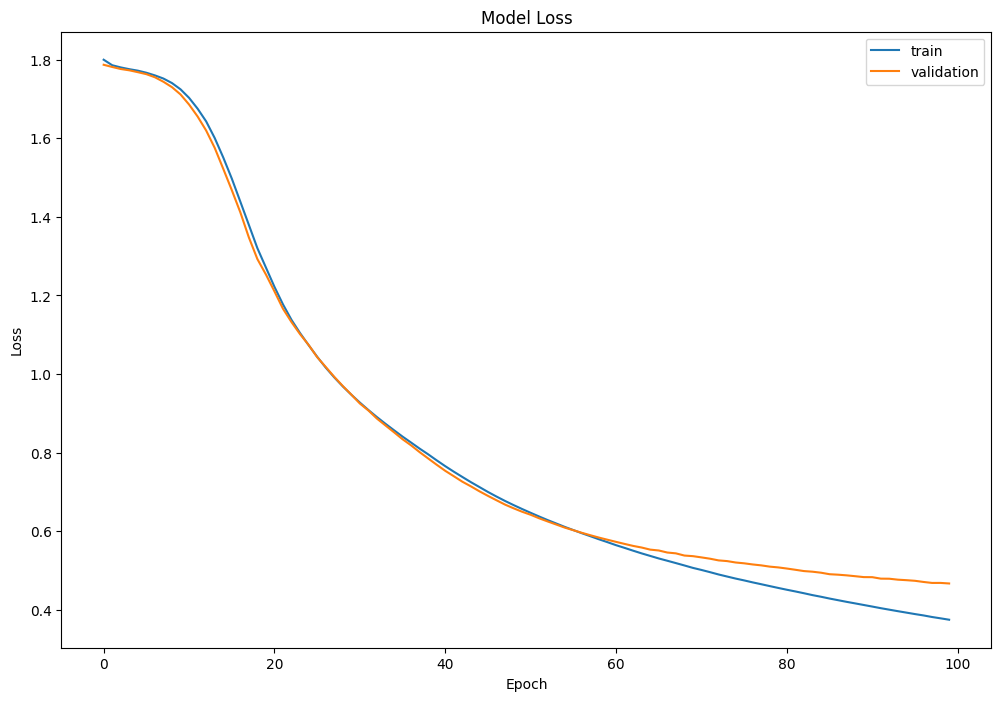

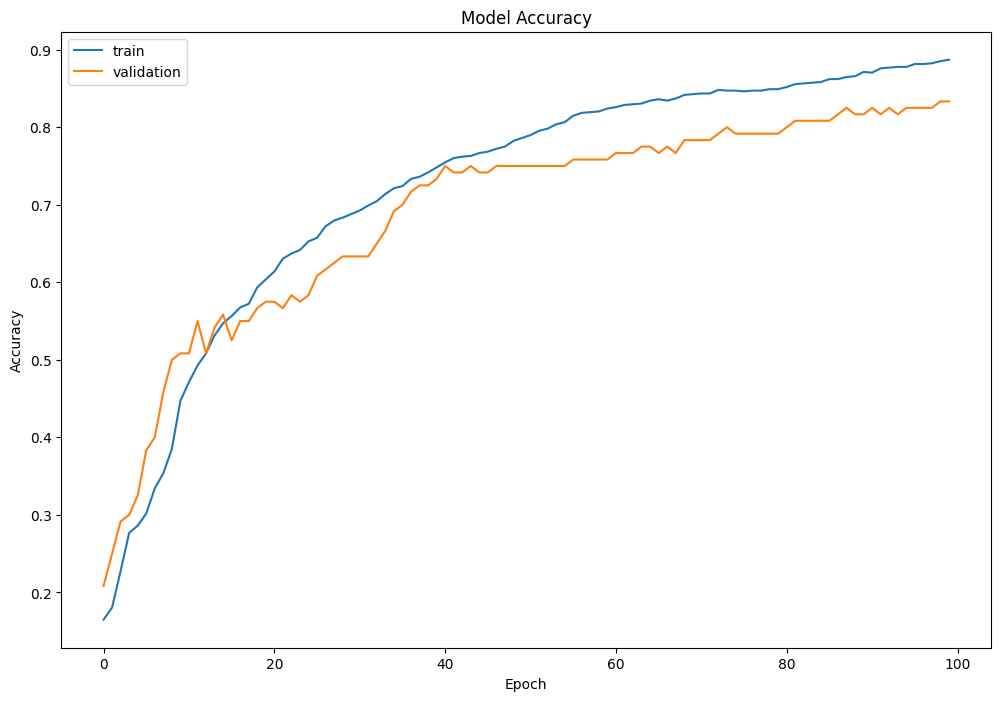

In [24]:
# Convert history.history into a DataFrame
df_loss_acc = pd.DataFrame(history.history)

# Create a copy of the DataFrame slices to avoid the warning
df_loss = df_loss_acc[['loss', 'val_loss']].copy()
df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)

df_acc = df_loss_acc[['accuracy', 'val_accuracy']].copy()
df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)

# Plot the loss and accuracy
df_loss.plot(title='Model Loss', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(title='Model Accuracy', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Accuracy')


**Congratulations**! We have built two models: One that recognizes  smiles, and another that recognizes SIGN language with almost 80% accuracy on the test set. In addition to that, we now also understand the applications of two Keras APIs: Sequential and Functional. Nicely done!

By now, we know a bit about how the Functional API works and may have glimpsed the possibilities. We'll really get a feel for its power when we get the opportunity to build a very deep ConvNet, using ResNets!

<a name='6'></a>
## 6 - Bibliography

You're always encouraged to read the official documentation. To that end, you can find the docs for the Sequential and Functional APIs here:

https://www.tensorflow.org/guide/keras/sequential_model

https://www.tensorflow.org/guide/keras/functional